In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from community import community_louvain

import pathfunctions as pf

import os
from os import path
from dotenv import load_dotenv

load_dotenv()

True

In [85]:
df_connectome = pd.read_csv(pf.trainPath("TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"))
df_quan = pd.read_excel(pf.trainPath("TRAIN_QUANTITATIVE_METADATA.xlsx"))
df_target = pd.read_excel(pf.trainPath("TRAINING_SOLUTIONS.xlsx"))

df_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [86]:
np.sum(df_connectome.isnull())

/home/Linux-Windows-Share/documents/biomed/other/wids2025/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64

In [87]:
num_patients = df_quan.shape[0]
num_patients

1213

In [88]:
df_quan_Hyper = df_quan[['participant_id','SDQ_SDQ_Hyperactivity']]
df_quan_Ext = df_quan[['participant_id','SDQ_SDQ_Externalizing']]

In [89]:
df_quan_Hyper.shape

(1213, 2)

In [90]:
df_quan['SDQ_SDQ_Externalizing'].isnull().sum()

np.int64(0)

In [91]:
df_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [92]:
df_connectome.shape

(1213, 19901)

In [93]:
df_hasADHD_F = df_target[(df_target["ADHD_Outcome"] == 1) & (df_target["Sex_F"] == 1)]
df_hasADHD_M = df_target[(df_target["ADHD_Outcome"] == 1) & (df_target["Sex_F"] == 0)]
df_noADHD_F = df_target[(df_target["ADHD_Outcome"] == 0) & (df_target["Sex_F"] == 1)]
df_noADHD_M = df_target[(df_target["ADHD_Outcome"] == 0) & (df_target["Sex_F"] == 0)]

In [94]:
df_connectome_hasADHD_F = df_connectome[df_connectome['participant_id'].isin(df_hasADHD_F['participant_id'])]
df_connectome_hasADHD_M = df_connectome[df_connectome['participant_id'].isin(df_hasADHD_M['participant_id'])]
df_connectome_noADHD_F = df_connectome[df_connectome['participant_id'].isin(df_noADHD_F['participant_id'])]
df_connectome_noADHD_M = df_connectome[df_connectome['participant_id'].isin(df_noADHD_M['participant_id'])]

In [95]:
df_connectome_hasADHD_F.shape

(250, 19901)

In [96]:
df_connectome_hasADHD_M.shape

(581, 19901)

In [97]:
# gettim the same ids
df_filtered_Hyper_F = df_quan_Hyper[df_quan_Hyper['participant_id'].isin(df_hasADHD_F['participant_id'])]
df_filtered_Hyper_M = df_quan_Hyper[df_quan_Hyper['participant_id'].isin(df_hasADHD_M['participant_id'])]

In [98]:
# gettim the same ids
df_filtered_Ext_F = df_quan_Ext[df_quan_Ext['participant_id'].isin(df_hasADHD_F['participant_id'])]
df_filtered_Ext_M = df_quan_Ext[df_quan_Ext['participant_id'].isin(df_hasADHD_M['participant_id'])]

In [99]:
print("Min:", np.min(df_connectome_hasADHD_F.drop("participant_id", axis=1).values))
print("Max:", np.max(df_connectome_hasADHD_F.drop("participant_id", axis=1).values))

Min: -0.3743669498233847
Max: 0.5208741506042309


In [100]:
df_connectome_hasADHD_F.shape

(250, 19901)

In [101]:
num_regions = 200  # brain regions
# compute expected and actual number of upper triangle elements
expected_upper_triangle = (num_regions * (num_regions - 1)) // 2    #excluding the diagonal
actual_vector_length = len(df_connectome_hasADHD_F.drop("participant_id", axis=1).iloc[0])
print(f"Expected Upper Triangle Elements: {expected_upper_triangle}")
print(f"Actual Connectivity Vector Length: {actual_vector_length}")

Expected Upper Triangle Elements: 19900
Actual Connectivity Vector Length: 19900


In [102]:
# with ADHD
num_regions = 200

# Drop the participant_id column to keep only connectivity values
connectivity_vectors = df_connectome_hasADHD_F.iloc[:, 1:].values  # Shape: (250, 19900)
num_patients = connectivity_vectors.shape[0]
# Get upper triangular indices
upper_tri_indices = np.triu_indices(num_regions, k=1)

# Initialize an array to store all patients' connectivity matrices
all_FC_hasADHD_F = np.zeros((num_patients, num_regions, num_regions))

# Reconstruct connectivity matrices for all patients
for i in range(num_patients):
    matrix = np.zeros((num_regions, num_regions))
    matrix[upper_tri_indices] = connectivity_vectors[i]  # Fill upper triangle
    matrix += matrix.T  # Mirror upper triangle to lower triangle
    np.fill_diagonal(matrix, 0)
    all_FC_hasADHD_F[i] = matrix

all_FC_hasADHD_F.shape

(250, 200, 200)

Text(0.5, 1.0, 'First Female Patient with ADHD')

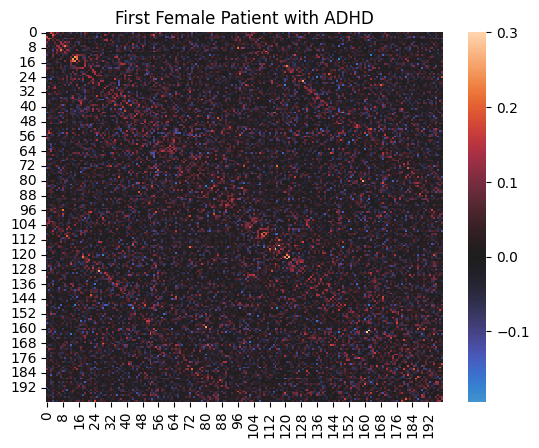

In [103]:
sns.heatmap(all_FC_hasADHD_F[0], center=0)
plt.title('First Female Patient with ADHD')

Text(0.5, 1.0, 'First Female Patient without ADHD')

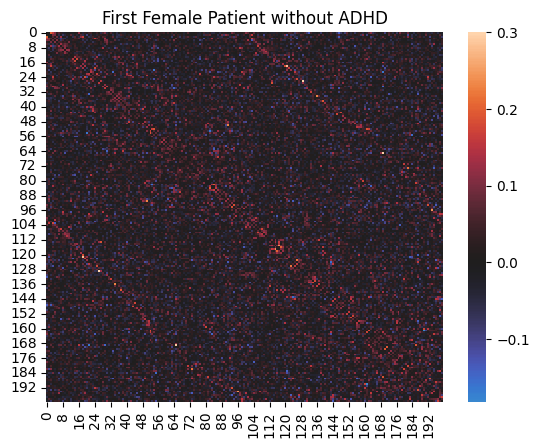

In [104]:
#without ADHD Female
num_regions = 200
connectivity_vectors = df_connectome_noADHD_F.iloc[:, 1:].values  # Shape: (166, 19900)

num_patients = connectivity_vectors.shape[0]
upper_tri_indices = np.triu_indices(num_regions, k=1)

# Initialize an array to store all patients' connectivity matrices
all_FC_noADHD_F = np.zeros((num_patients, num_regions, num_regions))

# Reconstruct connectivity matrices for all patients
for i in range(num_patients):
    matrix = np.zeros((num_regions, num_regions))
    matrix[upper_tri_indices] = connectivity_vectors[i]  # Fill upper triangle
    matrix += matrix.T  # Mirror upper triangle to lower triangle
    np.fill_diagonal(matrix, 0)
    all_FC_noADHD_F[i] = matrix

sns.heatmap(all_FC_noADHD_F[0], center=0)
plt.title('First Female Patient without ADHD')

Text(0.5, 1.0, 'FCs Hist of a Female with ADHD')

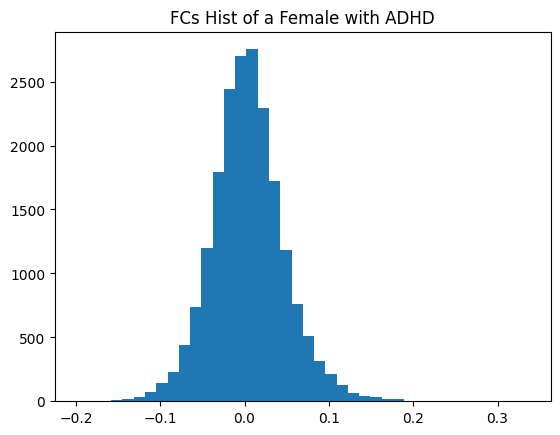

In [105]:
plt.hist(df_connectome_hasADHD_F.iloc[90, 1:].values, bins=40)
plt.title('FCs Hist of a Female with ADHD')
# NOTE: no need for fisher Z transfrmation already normal distribution

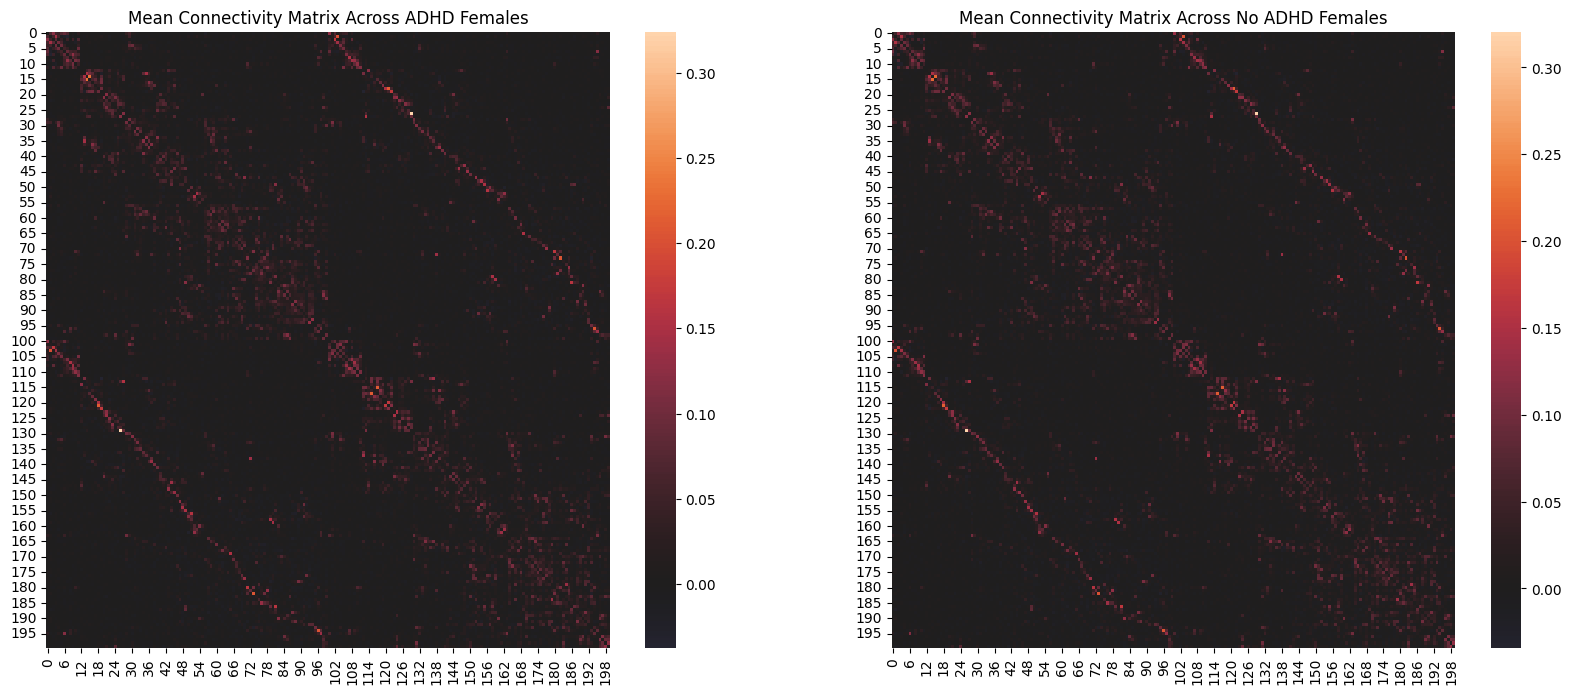

In [106]:
# ALL FEMALES
mean_FC_hasADHD_F = np.mean(all_FC_hasADHD_F, axis=0)
mean_FC_noADHD_F = np.mean(all_FC_noADHD_F, axis=0)

# Plot the mean connectivity matrix
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.heatmap(mean_FC_hasADHD_F,center=0)
plt.title("Mean Connectivity Matrix Across ADHD Females")
plt.subplot(122)
sns.heatmap(mean_FC_noADHD_F,center=0)
plt.title("Mean Connectivity Matrix Across No ADHD Females")
plt.show()

In [107]:
# with ADHD Male
num_regions = 200

# Drop the participant_id column to keep only connectivity values
connectivity_vectors_M = df_connectome_hasADHD_M.iloc[:, 1:].values  # Shape: (581, 19900)

# Ensure the shape is correct
num_patients = connectivity_vectors_M.shape[0]
assert connectivity_vectors_M.shape[1] == (num_regions * (num_regions - 1)) // 2, "Unexpected number of connectivity values!"

# Get upper triangular indices
upper_tri_indices = np.triu_indices(num_regions, k=1)

# Initialize an array to store all patients' connectivity matrices
all_FC_hasADHD_M = np.zeros((num_patients, num_regions, num_regions))

# Reconstruct connectivity matrices for all patients
for i in range(num_patients):
    matrix = np.zeros((num_regions, num_regions))
    matrix[upper_tri_indices] = connectivity_vectors_M[i]  # Fill upper triangle
    matrix += matrix.T  # Mirror upper triangle to lower triangle
    np.fill_diagonal(matrix, 0)
    all_FC_hasADHD_M[i] = matrix

# Display shape confirmation
all_FC_hasADHD_M.shape

(581, 200, 200)

Text(0.5, 1.0, 'First Male Patient with ADHD')

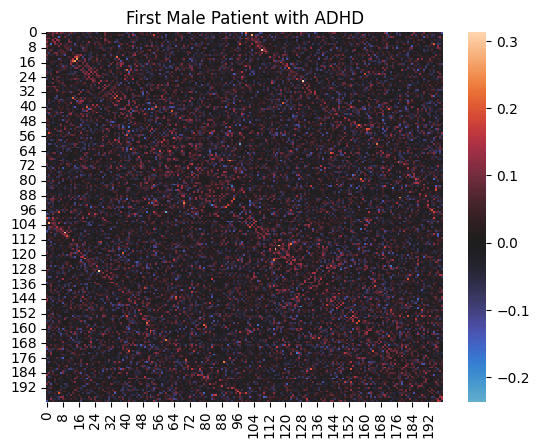

In [108]:
sns.heatmap(all_FC_hasADHD_M[1], center=0)
plt.title('First Male Patient with ADHD')

Text(0.5, 1.0, 'first Male patient without ADHD')

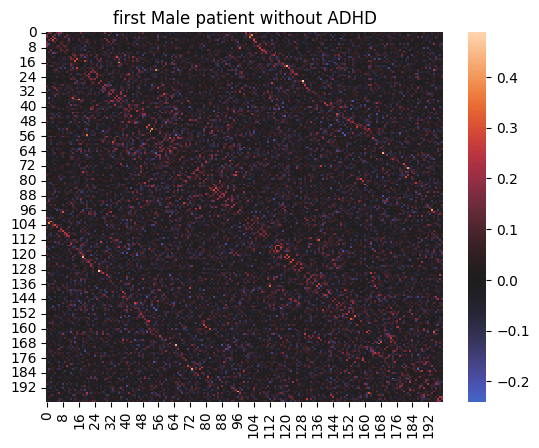

In [109]:
#without ADHD Male
num_regions = 200

# Drop the participant_id column to keep only connectivity values
connectivity_vectors = df_connectome_noADHD_M.iloc[:, 1:].values   # (216, 19900)
num_patients = connectivity_vectors.shape[0]
upper_tri_indices = np.triu_indices(num_regions, k=1)

# Initialize an array to store all patients' connectivity matrices
all_FC_noADHD_M = np.zeros((num_patients, num_regions, num_regions))

# Reconstruct connectivity matrices for all patients
for i in range(num_patients):
    matrix = np.zeros((num_regions, num_regions))
    matrix[upper_tri_indices] = connectivity_vectors[i]  # Fill upper triangle
    matrix += matrix.T  # Mirror upper triangle to lower triangle
    np.fill_diagonal(matrix, 0)
    all_FC_noADHD_M[i] = matrix

sns.heatmap(all_FC_noADHD_M[1], center=0)
plt.title('first Male patient without ADHD')

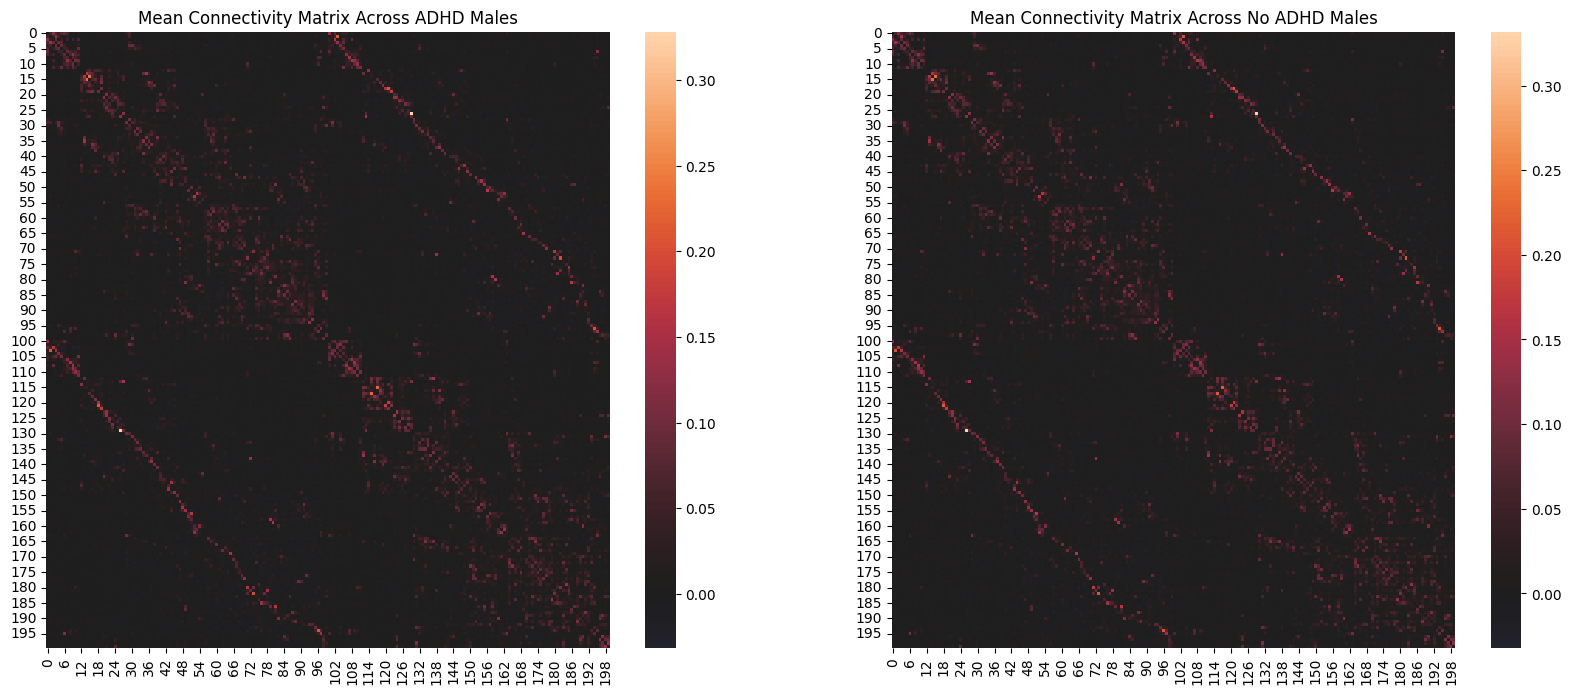

In [110]:
# ALL MALE
mean_FC_hasADHD_M= np.mean(all_FC_hasADHD_M, axis=0)
mean_FC_noADHD_M = np.mean(all_FC_noADHD_M, axis=0)

# Plot the mean connectivity matrix
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.heatmap(mean_FC_hasADHD_M,center=0)
plt.title("Mean Connectivity Matrix Across ADHD Males")
plt.subplot(122)
sns.heatmap(mean_FC_noADHD_M,center=0)
plt.title("Mean Connectivity Matrix Across No ADHD Males")
plt.show()

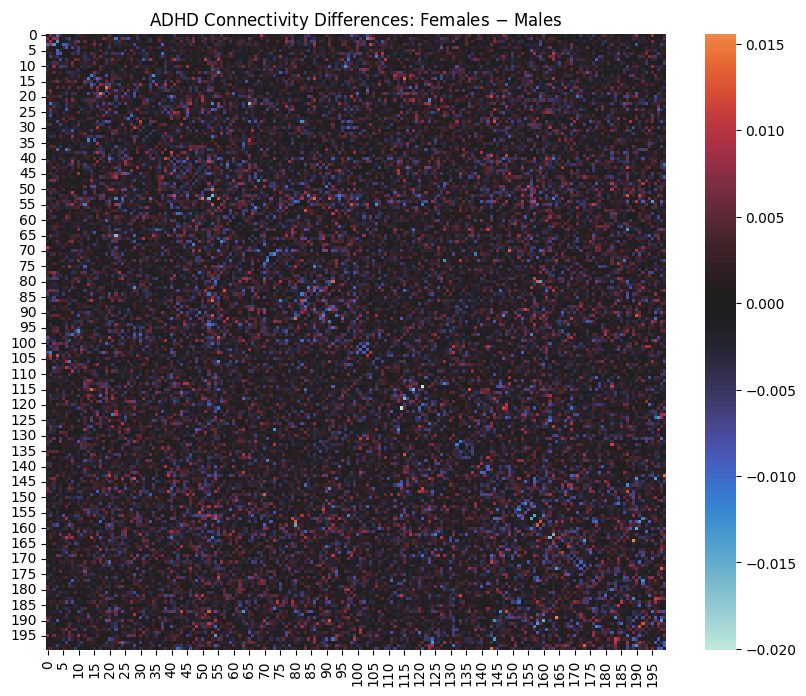

In [111]:
# Compute male-female difference
connectivity_diff_sex = mean_FC_hasADHD_F - mean_FC_hasADHD_M
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_diff_sex, center=0)
plt.title("ADHD Connectivity Differences: Females $-$ Males")
plt.show()

In [112]:
mean_FC_hasADHD_F.shape

(200, 200)

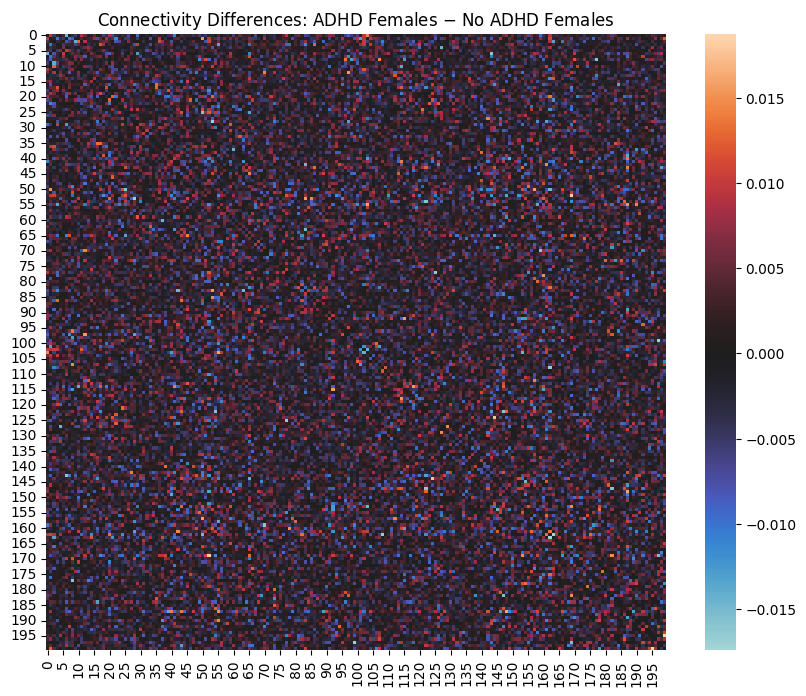

In [113]:
# Compute male-female difference
connectivity_diff_sex = mean_FC_hasADHD_F - mean_FC_noADHD_F
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_diff_sex, center=0)
plt.title("Connectivity Differences: ADHD Females $-$ No ADHD Females")
plt.savefig(pf.imgPath("connectivity_diff_sex.png"), dpi=600, bbox_inches='tight')
plt.show()

In [114]:
all_FC_hasADHD_F.shape

(250, 200, 200)

In [115]:
all_FC_noADHD_F.shape

(166, 200, 200)

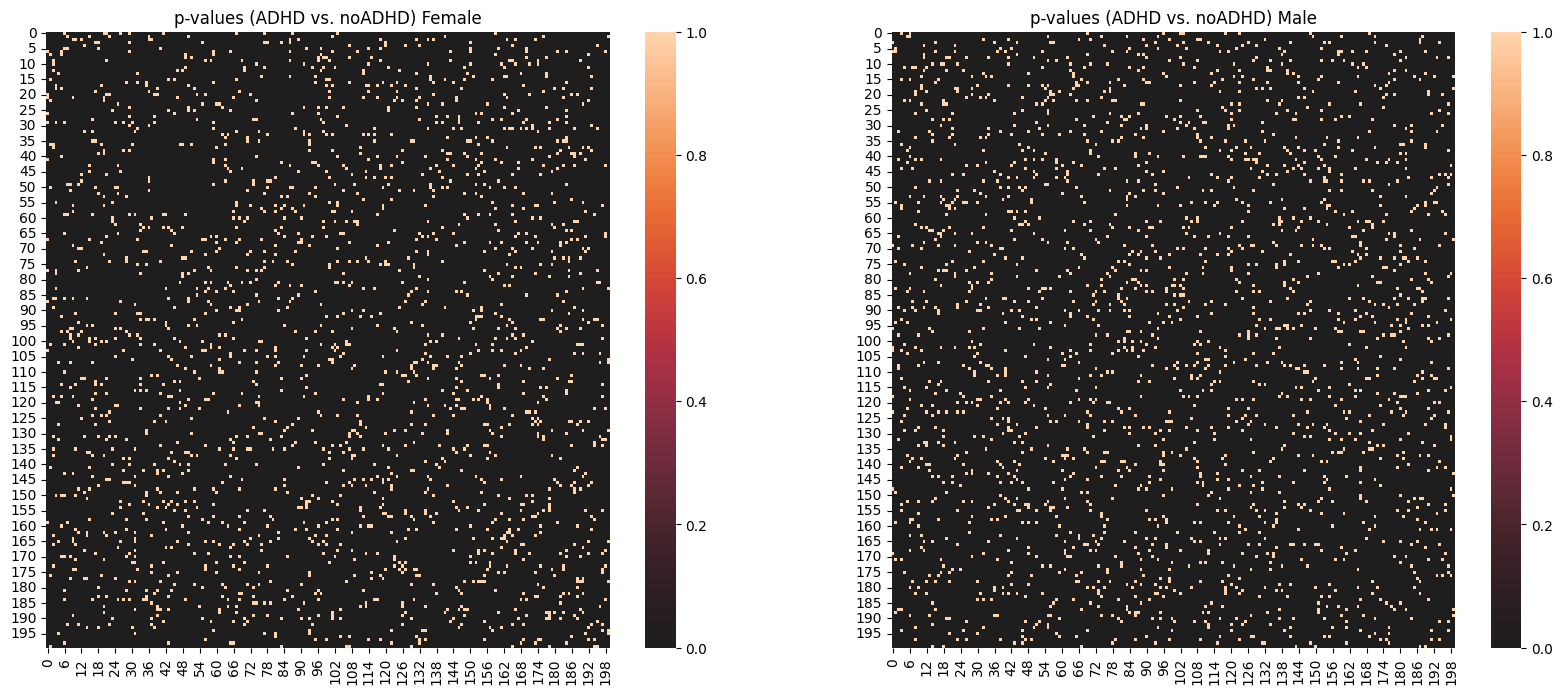

In [116]:
from scipy.stats import ttest_ind
# Perform t-tests for each connection across ADHD and noADHD groups
t_values_F, p_values_F = ttest_ind(all_FC_hasADHD_F, all_FC_noADHD_F, axis=0)
t_values_M, p_values_M = ttest_ind(all_FC_hasADHD_M, all_FC_noADHD_M, axis=0)
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.heatmap(p_values_F < 0.05, center=0)
plt.title("p-values (ADHD vs. noADHD) Female")
plt.subplot(122)
sns.heatmap(p_values_M < 0.05, center=0)
plt.title("p-values (ADHD vs. noADHD) Male")
plt.show()


📌 What is FDR (False Discovery Rate)?
False Discovery Rate (FDR) correction is a multiple comparisons correction method that controls for the proportion of false positives (incorrectly significant results) when performing many statistical tests.

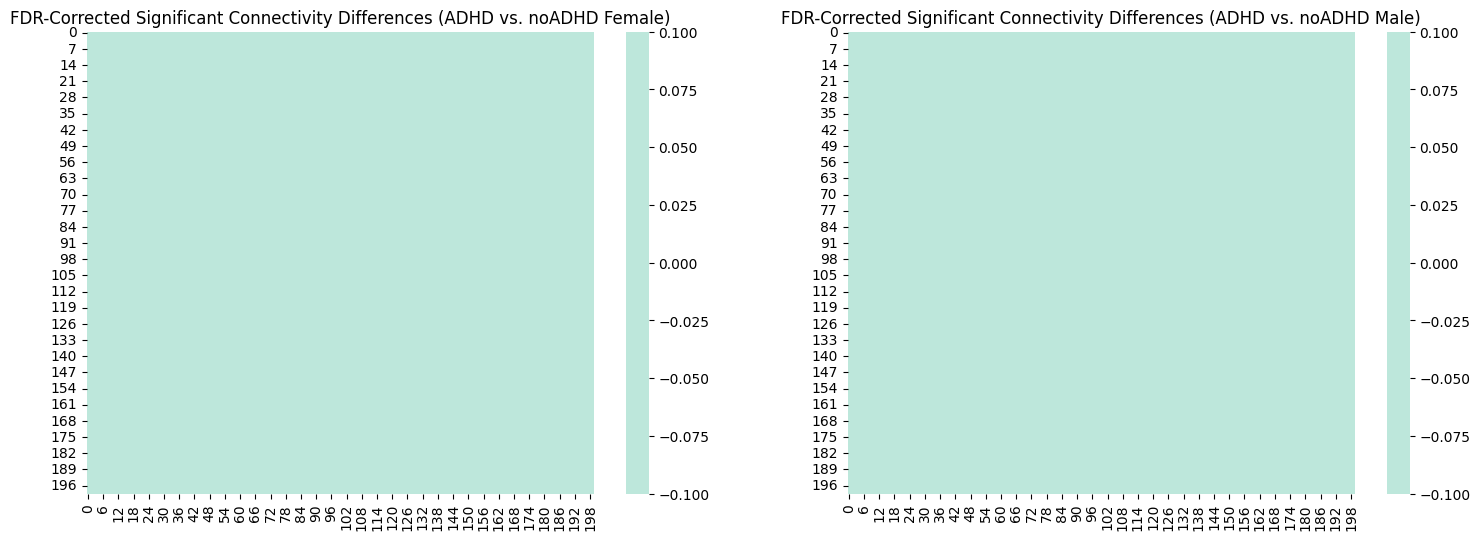

In [117]:
# NO FALSE POSITIVES
# alpha mean chance to observe ones so 0.5 is a lot!

from statsmodels.stats.multitest import fdrcorrection

# Apply FDR correction
significant_mask_F, p_corrected_F = fdrcorrection(p_values_F.flatten(), alpha=0.1)
significant_mask_F = significant_mask_F.reshape((200, 200))
significant_mask_M, p_corrected_M = fdrcorrection(p_values_M.flatten(), alpha=0.1)
significant_mask_M = significant_mask_M.reshape((200, 200))

# Plot corrected significant results
plt.figure(figsize=(18, 6))
plt.subplot(121)
sns.heatmap(significant_mask_F, center=0)
plt.title("FDR-Corrected Significant Connectivity Differences (ADHD vs. noADHD Female)")
plt.subplot(122)
sns.heatmap(significant_mask_M, center=0)
plt.title("FDR-Corrected Significant Connectivity Differences (ADHD vs. noADHD Male)")
plt.show()

In [118]:
import networkx as nx

# Convert connectivity matrix into an undirected graph_ADHD_F (thresholding needed)
threshold = 0.1  # Set a threshold to remove weak connections
binary_matrix = (mean_FC_hasADHD_F > threshold).astype(int)
# Create a graph_ADHD_F from the binary matrix
graph_ADHD_F = nx.from_numpy_array(binary_matrix)

# Compute degree centrality
degree_centrality = nx.degree_centrality(graph_ADHD_F)

# Convert to a DataFrame
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])

clustering_coeffs = nx.clustering(graph_ADHD_F)
clustering_df = pd.DataFrame.from_dict(clustering_coeffs, orient='index', columns=['Clustering Coefficient'])

In [119]:
clustering_df

,Clustering Coefficient
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
195,0.0
196,0.0
197,0.0
198,0.0


Clustering Coefficient:
Measures how well a node’s neighbors are connected to each other.

High clustering = Stronger local network structure.

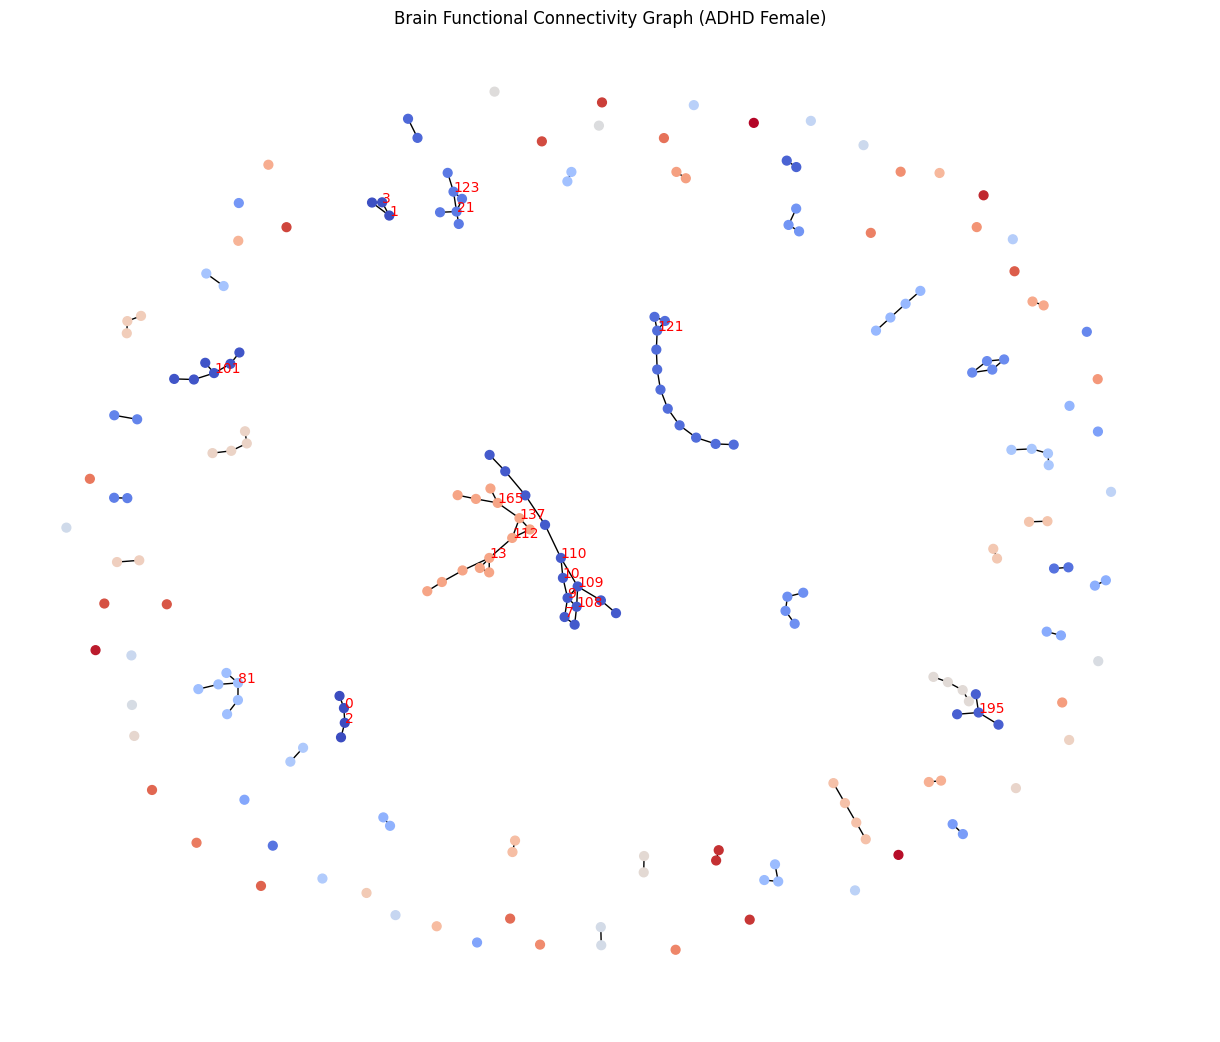

In [120]:

# from community import best_partition
# Apply Louvain Algorithm
partition = community_louvain.best_partition(graph_ADHD_F)

# Convert to DataFrame
louvain_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(graph_ADHD_F, seed=42)  # Layout for visualization
# Draw nodes colored by community
colors = [partition[node] for node in graph_ADHD_F.nodes()]
nx.draw(graph_ADHD_F, pos, node_color=colors, cmap=plt.get_cmap("coolwarm"), node_size=40, with_labels=False)

# Highlight key hubs (top 10 most connected nodes)
top_hubs = degree_df.nlargest(20, 'Degree Centrality')
for node in top_hubs.index:
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, color="red")

plt.title("Brain Functional Connectivity Graph (ADHD Female)")
plt.show()


In [121]:
hubs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Most Connected Brain Regions:", hubs)


Top 10 Most Connected Brain Regions: [(9, 0.020100502512562814), (13, 0.020100502512562814), (21, 0.020100502512562814), (109, 0.020100502512562814), (81, 0.01507537688442211), (101, 0.01507537688442211), (108, 0.01507537688442211), (110, 0.01507537688442211), (112, 0.01507537688442211), (121, 0.01507537688442211)]


In [122]:
# Convert connectivity matrix into an undirected graph_noADHD_F (thresholding needed)
threshold = 0.1  # Set a threshold to remove weak connections
binary_matrix = (mean_FC_noADHD_F > threshold).astype(int)
# Create a graph_noADHD_F from the binary matrix
graph_noADHD_F = nx.from_numpy_array(binary_matrix)


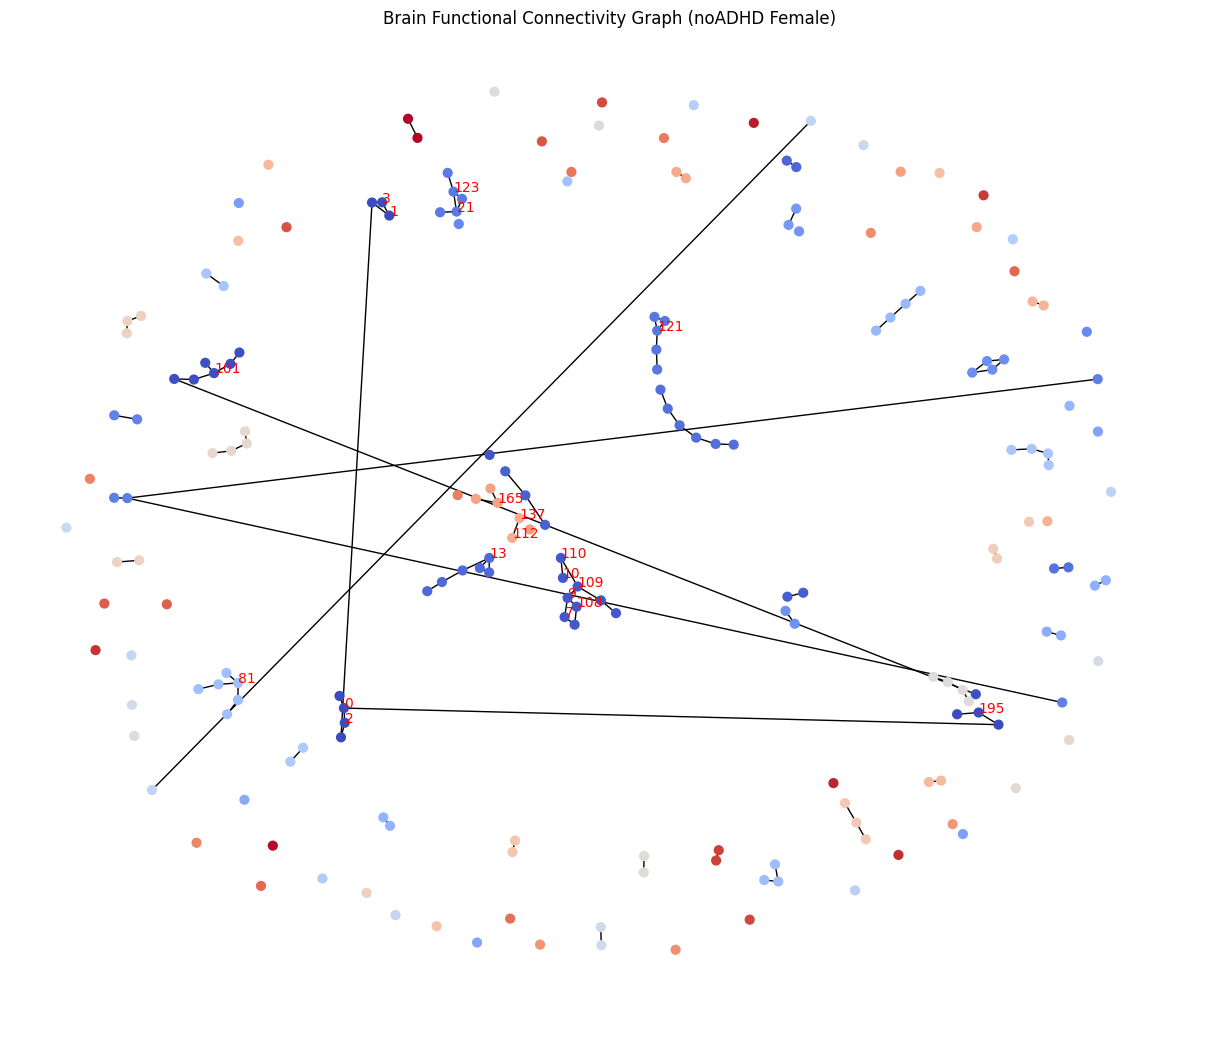

In [123]:
# Apply Louvain Algorithm
partition = community_louvain.best_partition(graph_noADHD_F)

# Convert to DataFrame
louvain_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])
import matplotlib.pyplot as plt
pos = nx.spring_layout(graph_ADHD_F, seed=42)  # Layout for visualization
plt.figure(figsize=(12, 10))
colors = [partition[node] for node in graph_noADHD_F.nodes()]
nx.draw(graph_noADHD_F, pos, node_color=colors, cmap=plt.get_cmap("coolwarm"), node_size=40, with_labels=False)

# Highlight key hubs (top 10 most connected nodes)
top_hubs = degree_df.nlargest(20, 'Degree Centrality')
for node in top_hubs.index:
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, color="red")

plt.title("Brain Functional Connectivity Graph (noADHD Female)")
plt.show()

More long-range connections (black edges).

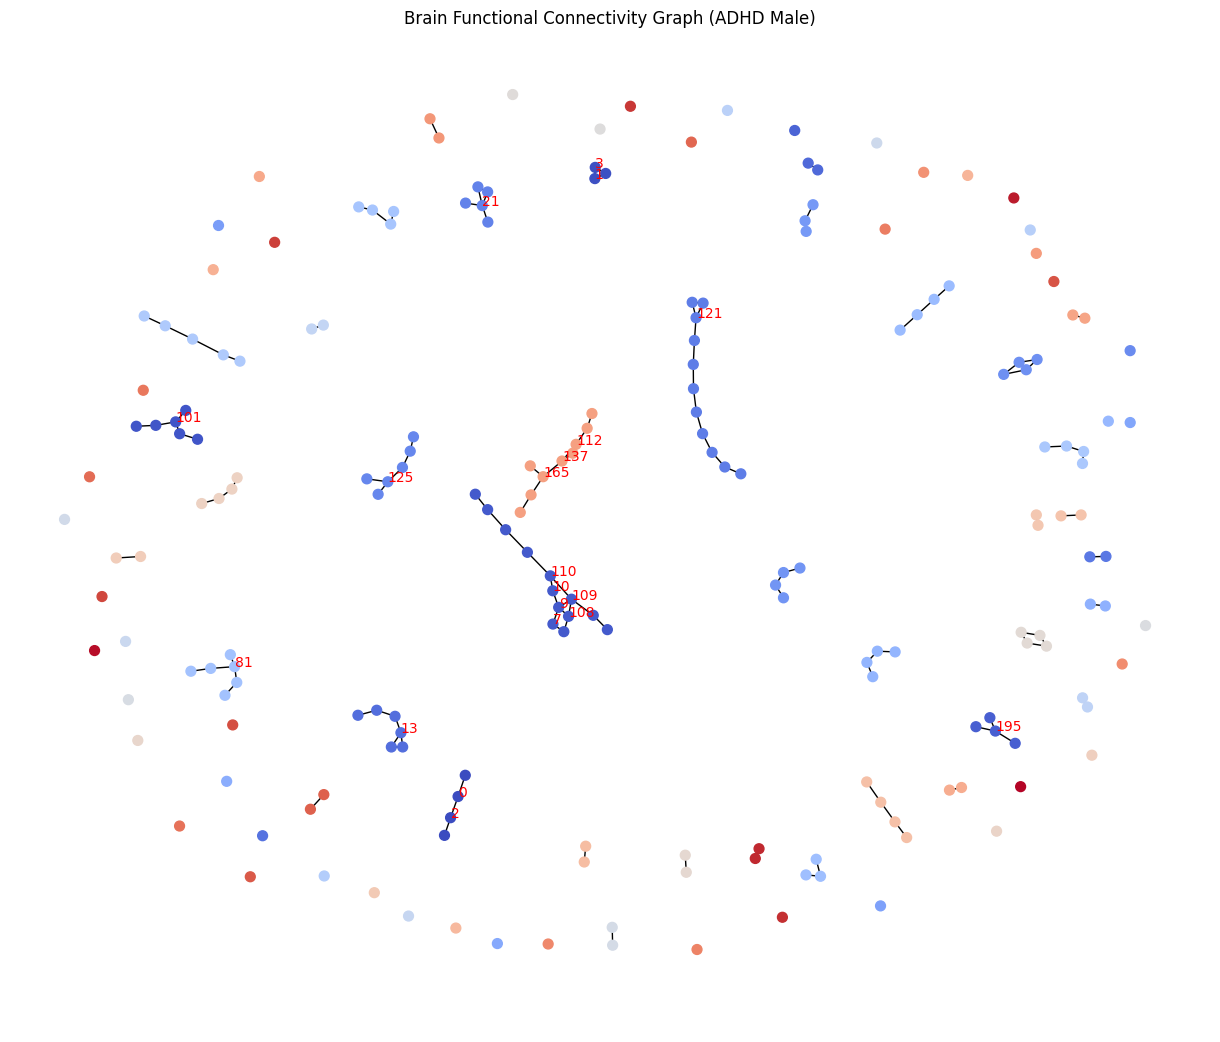

In [124]:
threshold = 0.1  # Set a threshold to remove weak connections
binary_matrix = (mean_FC_hasADHD_M > threshold).astype(int)
# Create a graph_ADHD_M from the binary matrix
graph_ADHD_M = nx.from_numpy_array(binary_matrix)

# Compute degree centrality
degree_centrality = nx.degree_centrality(graph_ADHD_M)

# Convert to a DataFrame
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])

clustering_coeffs = nx.clustering(graph_ADHD_M)
clustering_df = pd.DataFrame.from_dict(clustering_coeffs, orient='index', columns=['Clustering Coefficient'])

# Apply Louvain Algorithm
partition = community_louvain.best_partition(graph_ADHD_M)

# Convert to DataFrame
louvain_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(graph_ADHD_M, seed=42)  # Layout for visualization
# Draw nodes colored by community
colors = [partition[node] for node in graph_ADHD_M.nodes()]
nx.draw(graph_ADHD_M, pos, node_color=colors, cmap=plt.get_cmap("coolwarm"), node_size=50, with_labels=False)

# Highlight key hubs (top 10 most connected nodes)
top_hubs = degree_df.nlargest(20, 'Degree Centrality')
for node in top_hubs.index:
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, color="red")

plt.title("Brain Functional Connectivity Graph (ADHD Male)")
plt.show()

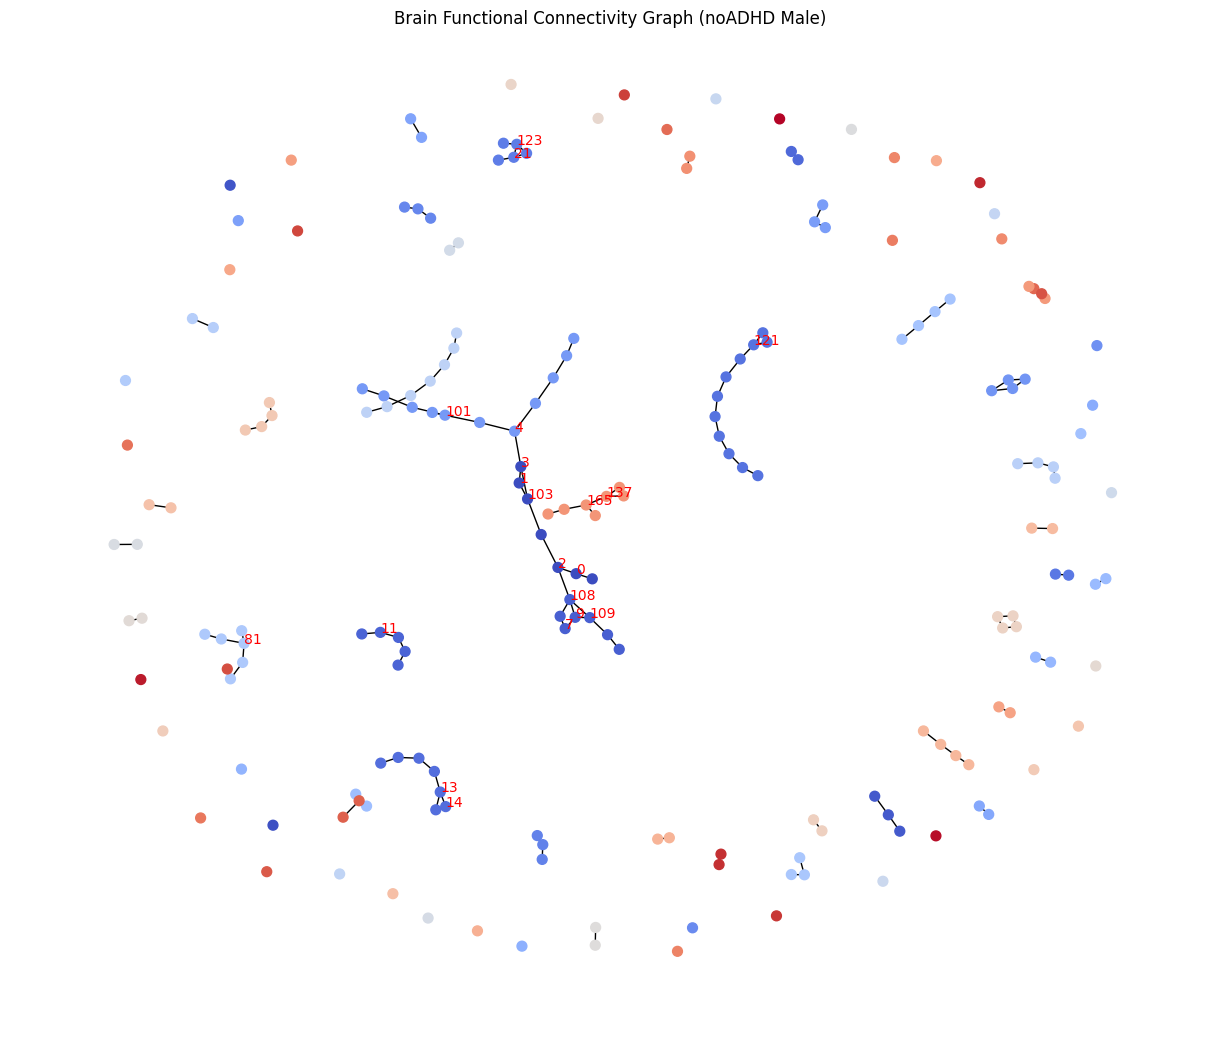

In [125]:
threshold = 0.1  # Set a threshold to remove weak connections
binary_matrix = (mean_FC_noADHD_M > threshold).astype(int)
# Create a graph_noADHD_M from the binary matrix
graph_noADHD_M = nx.from_numpy_array(binary_matrix)

# Compute degree centrality
degree_centrality = nx.degree_centrality(graph_noADHD_M)

# Convert to a DataFrame
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])

clustering_coeffs = nx.clustering(graph_noADHD_M)
clustering_df = pd.DataFrame.from_dict(clustering_coeffs, orient='index', columns=['Clustering Coefficient'])

# Apply Louvain Algorithm
partition = community_louvain.best_partition(graph_noADHD_M)

# Convert to DataFrame
louvain_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(graph_noADHD_M, seed=42)  # Layout for visualization
# Draw nodes colored by community
colors = [partition[node] for node in graph_noADHD_M.nodes()]
nx.draw(graph_noADHD_M, pos, node_color=colors, cmap=plt.get_cmap("coolwarm"), node_size=50, with_labels=False)

# Highlight key hubs (top 10 most connected nodes)
top_hubs = degree_df.nlargest(20, 'Degree Centrality')
for node in top_hubs.index:
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, color="red")

plt.title("Brain Functional Connectivity Graph (noADHD Male)")
plt.show()

In [126]:
# Compute the mean connectivity matrices for no-ADHD females and no-ADHD males
mean_connectivity_noADHD_F = np.mean(all_FC_noADHD_F, axis=0)
mean_connectivity_noADHD_M = np.mean(all_FC_noADHD_M, axis=0)

# Compute the total number of strong connections (above threshold) for each group
threshold = 0.1  # Set a threshold for strong connectivity

num_connections_noADHD_F = np.sum(mean_connectivity_noADHD_F > threshold)
num_connections_noADHD_M = np.sum(mean_connectivity_noADHD_M > threshold)

# Display results
connection_counts = pd.DataFrame({
    "Group": ["No ADHD Female", "No ADHD Male"],
    "Total Strong Connections": [num_connections_noADHD_F, num_connections_noADHD_M]
})

connection_counts

,Group,Total Strong Connections
0,No ADHD Female,206
1,No ADHD Male,246
